In [16]:
import pandas as pd

# 판다스

1. 설치해야하는 라이브러리
2. 자료구조 : 시리즈, 데이터프레임

## 1. 데이터 읽기

In [215]:
df = pd.read_csv('./data/gapminder.tsv', sep='\t')
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [18]:
type(df)

pandas.core.frame.DataFrame

### 1.1 데이터프레임 이해하기

In [95]:
print(df.shape)  # (row, column), 건수, 항목수
print(df.shape[1])
print(type(df.shape[1]))

(1704, 6)
6
<class 'int'>


In [ ]:
df.head() # 위의 5건 출력 - default, subset(전체 데이터 가운데 일부)

In [13]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [24]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

EDA 탐색적 데이터 분석  - shape, columns, dtypes 

dtype object : str

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


### 1.2 데이터 추출하기

In [25]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


#### 1.2.1 열추출

In [26]:
df['country']

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [27]:
type(df['country']) # 시리즈객체

pandas.core.series.Series

In [38]:
df1 = df['country']
df1.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [32]:
# df['country','continent']  ## 얘네는 에러다
df[ ['country','continent'] ] ## 리스트만 지원 --> [속성목록]을 이용해서 데이터프레임 추출

,country,continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia
...,...,...
1699,Zimbabwe,Africa
1700,Zimbabwe,Africa
1701,Zimbabwe,Africa
1702,Zimbabwe,Africa


In [36]:
#보고 싶은 컬럼 4개를 추출한 서브셋을 생성
df2 = df[ ['country','year','lifeExp','pop'] ]
df2

,country,year,lifeExp,pop
0,Afghanistan,1952,28.801,8425333
1,Afghanistan,1957,30.332,9240934
2,Afghanistan,1962,31.997,10267083
3,Afghanistan,1967,34.020,11537966
4,Afghanistan,1972,36.088,13079460
...,...,...,...,...
1699,Zimbabwe,1987,62.351,9216418
1700,Zimbabwe,1992,60.377,10704340
1701,Zimbabwe,1997,46.809,11404948
1702,Zimbabwe,2002,39.989,11926563


In [39]:
type(df1), type(df2)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

#### 1.2.2 행추출

1. loc (행 이름), default : rangeindex -> number, 인덱스의 이름을 변경 -> 이름으로 추출
2. iloc (행번호)

In [41]:
df.loc[0]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object

In [44]:
df.loc[99]  ## 100번째 행 추출

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object

In [218]:
# df.loc.[-1]  ## 얘는 에러 난다
df.loc[ df.shape[0-1] ], df.loc[ df.shape[0] -1 ]# row 수로 맨 끝의 행 꺼낼때


(country      Afghanistan
 continent           Asia
 year                1982
 lifeExp           39.854
 pop             12881816
 gdpPercap     978.011439
 Name: 6, dtype: object,
 country        Zimbabwe
 continent        Africa
 year               2007
 lifeExp          43.487
 pop            12311143
 gdpPercap    469.709298
 Name: 1703, dtype: object)

In [51]:
# 여러 행을 추출 - []로 지정
df.loc[ [0,1,4] ]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [53]:
## 현재 데이터프레임에서는 loc와 iloc가 동일하다
df.iloc[ [0,1,4] ] 

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [222]:
# loc와 iloc의 차이는 컬럼을 꺼내는 방식에서 난다
df.loc[ [0], ['country'] ] #행, 열을 같이 지정해서 추출 ,로 구분
# df.loc[ [0], [0] ]  ## 얘도 에러남

,country
0,Afghanistan


In [220]:
df.iloc[ [0], ['country'] ]

IndexError: .iloc requires numeric indexers, got ['country']

In [56]:
df.iloc[[0], [0]]

,country
0,Afghanistan


In [61]:
# slicing : colon
# df.loc[ , ['country'] ]  # 전체일때는 : 표시 (시작과 끝 생략)
df.loc[ : , ['country'] ]

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
...,...
1699,Zimbabwe
1700,Zimbabwe
1701,Zimbabwe
1702,Zimbabwe


In [62]:
df.loc[ 0:10 , ['country'] ]

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
5,Afghanistan
6,Afghanistan
7,Afghanistan
8,Afghanistan
9,Afghanistan


In [64]:
df.iloc[ 0:10 , [0] ]

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
5,Afghanistan
6,Afghanistan
7,Afghanistan
8,Afghanistan
9,Afghanistan


#### 1.2.3 range()

In [223]:
r_list = list(range(0,5,2)) #step 사용
df.iloc[:, r_list]

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


In [67]:
df.iloc[:, 0:6:2]   # : 을 이용한 slicing 구문

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


In [74]:
df.iloc[ : , [df.shape[1] -1] ].head(10)
df.iloc[ :10, [-1]]  # 두개가 같다. 열에서 -1이 되는 이유는 열 자리에 리스트 타입이 들어갈 수 있기 때문

,gdpPercap
0,779.445314
1,820.853030
2,853.100710
3,836.197138
4,739.981106
5,786.113360
6,978.011439
7,852.395945
8,649.341395
9,635.341351


## 1.3 기초 통계 계산하기

In [75]:
#descriptive의 약자 describe - numeric data만 나타내줌
# 전체 데이터의 요약
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [77]:
# 그룹화 > 데이터 분할 > 통계
# 연도별 기대수명의 평균
# 대륙별 국가 갯수
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [80]:
df.groupby('continent')['pop'].max().sort_index(ascending=False)

continent
Oceania       20434176
Europe        82400996
Asia        1318683096
Americas     301139947
Africa       135031164
Name: pop, dtype: int64

In [86]:
max = df.groupby('continent')['pop'].max()
max.sort_values(ascending=False)

continent
Asia        1318683096
Americas     301139947
Africa       135031164
Europe        82400996
Oceania       20434176
Name: pop, dtype: int64

In [88]:
# 빈도수 계산 nunique()
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [89]:
#value_counts()
df.groupby('continent')['country'].value_counts()

continent  country       
Africa     Algeria           12
           Angola            12
           Benin             12
           Botswana          12
           Burkina Faso      12
                             ..
Europe     Switzerland       12
           Turkey            12
           United Kingdom    12
Oceania    Australia         12
           New Zealand       12
Name: count, Length: 142, dtype: int64

### 1.4 그래프로 그리기

In [92]:
year_lifeExp_mean = df.groupby('year')['lifeExp'].mean()
year_lifeExp_mean

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

<Axes: xlabel='year'>

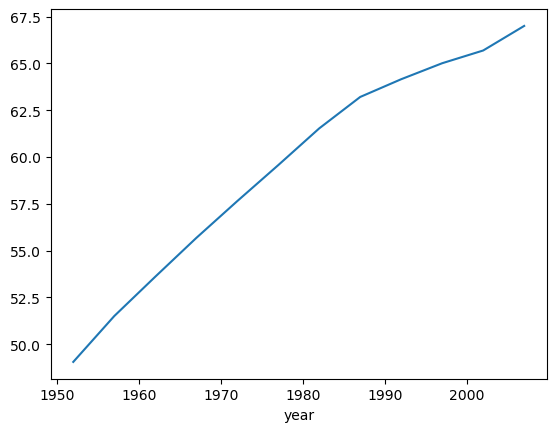

In [93]:
year_lifeExp_mean.plot()

# 2. 데이터 다루기

## 2.1 시리즈 만들기

- 1차원 자료 : 리스트와 유사, 넘파이의 어레이을 기본으로 만들어짐
- 한 열의 데이터는 모두 동일한 타입

In [97]:
import pandas as pd
pd.Series(['bananana', 10])

0    bananana
1          10
dtype: object

In [102]:
s1 = pd.Series(data=['홍길동', '김길동'], index= ['a','b'])

In [103]:
s1.loc['a']

'홍길동'

In [104]:
s1.iloc[0]

'홍길동'

## 2.2 데이터프레임 만들기

In [105]:
scientists = pd.DataFrame({
        "Name": ["Rosaline Franklin", "William Gosset"],
        "Occupation": ["Chemist", "Statistician"],
        "Born": ["1920-07-25", "1876-06-13"],
        "Died": ["1958-04-16", "1937-10-16"],
        "Age": [37, 61],
})

In [106]:
scientists.columns

Index(['Name', 'Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [107]:
scientists

,Name,Occupation,Born,Died,Age
0,Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
1,William Gosset,Statistician,1876-06-13,1937-10-16,61


In [110]:
scient1 = scientists.set_index(['Name'])

In [111]:
scient1

,Occupation,Born,Died,Age
Name,,,,
Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,Statistician,1876-06-13,1937-10-16,61


In [224]:

#name column 을 인덱스로 지정해서 데이터 프레임 생성하기
scient1 = pd.DataFrame(
    data = {
        "Occupation": ["Chemist", "Statistician"],
        "Born": ["1920-07-25", "1876-06-13"],
        "Died": ["1958-04-16", "1937-10-16"],
        "Age": [37, 61],
    }
    ,
    index = ["Rosaline Franklin", "William Gosset"]
)

In [225]:
scient1

,Occupation,Born,Died,Age
Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,Statistician,1876-06-13,1937-10-16,61


In [229]:
f_row = scient1.loc['Rosaline Franklin']#, iloc[]
f_row, type(f_row), f_row.values

(Occupation       Chemist
 Born          1920-07-25
 Died          1958-04-16
 Age                   37
 Name: Rosaline Franklin, dtype: object,
 pandas.core.series.Series,
 array(['Chemist', '1920-07-25', '1958-04-16', 37], dtype=object))

In [230]:
f_row.index, f_row.keys(),scient1

(Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object'),
 Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object'),
                      Occupation        Born        Died  Age
 Rosaline Franklin       Chemist  1920-07-25  1958-04-16   37
 William Gosset     Statistician  1876-06-13  1937-10-16   61)

In [231]:
scient1.loc[:,'Age']

Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64

In [232]:
age = scient1['Age']
age, age.mean() #평균, 최소값, 최대값, 표준편차

(Rosaline Franklin    37
 William Gosset       61
 Name: Age, dtype: int64,
 49.0)

In [233]:
scient2 = pd.read_csv('./data/scientists.csv')

In [237]:
scient2, scient2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


(                   Name        Born        Died  Age          Occupation
 0     Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist
 1        William Gosset  1876-06-13  1937-10-16   61        Statistician
 2  Florence Nightingale  1820-05-12  1910-08-13   90               Nurse
 3           Marie Curie  1867-11-07  1934-07-04   66             Chemist
 4         Rachel Carson  1907-05-27  1964-04-14   56           Biologist
 5             John Snow  1813-03-15  1858-06-16   45           Physician
 6           Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist
 7          Johann Gauss  1777-04-30  1855-02-23   77       Mathematician,
 None)

In [238]:
ages = scient2['Age']
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [239]:
ages.describe() #기술통계량 확인, ages.mean()

count     8.000000
mean     59.125000
std      18.325918
min      37.000000
25%      44.000000
50%      58.500000
75%      68.750000
max      90.000000
Name: Age, dtype: float64

In [240]:
ages[  ages > ages.mean()  ]  #벡터화, 불리언값 리스트

1    61
2    90
3    66
7    77
Name: Age, dtype: int64

In [241]:
ages + ages #element wise - vector + vector - rank1 array

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [242]:
ages + 10 #vector + scalar > broadcasting 

0     47
1     71
2    100
3     76
4     66
5     55
6     51
7     87
Name: Age, dtype: int64

In [243]:
s1 = pd.Series([1,100])
s1

0      1
1    100
dtype: int64

In [244]:
ages + s1 #넘파이의 브로드캐스팅과 차이, 반드시 벡터의 길이가 같아야 한다.

0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64

### 2.3 인덱스

In [245]:
#default 는 index 기준 정렬
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [246]:
rev_ages = ages.sort_index(ascending=False)
rev_ages

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

In [247]:
ages*2

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [248]:
ages + rev_ages  #같은 인덱스를 기준으로 자동 정렬, 연산 수행

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [250]:
first_half = scient2[:4]
second_half = scient2[4:]
first_half, second_half

(                   Name        Born        Died  Age    Occupation
 0     Rosaline Franklin  1920-07-25  1958-04-16   37       Chemist
 1        William Gosset  1876-06-13  1937-10-16   61  Statistician
 2  Florence Nightingale  1820-05-12  1910-08-13   90         Nurse
 3           Marie Curie  1867-11-07  1934-07-04   66       Chemist,
             Name        Born        Died  Age          Occupation
 4  Rachel Carson  1907-05-27  1964-04-14   56           Biologist
 5      John Snow  1813-03-15  1858-06-16   45           Physician
 6    Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist
 7   Johann Gauss  1777-04-30  1855-02-23   77       Mathematician)

In [251]:
pd.concat([first_half, second_half])

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [252]:
scient2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


In [253]:
#데이터프레임에 스칼라 연산 - column의 type에 따라 연산
scient2*2

,Name,Born,Died,Age,Occupation
0,Rosaline FranklinRosaline Franklin,1920-07-251920-07-25,1958-04-161958-04-16,74,ChemistChemist
1,William GossetWilliam Gosset,1876-06-131876-06-13,1937-10-161937-10-16,122,StatisticianStatistician
2,Florence NightingaleFlorence Nightingale,1820-05-121820-05-12,1910-08-131910-08-13,180,NurseNurse
3,Marie CurieMarie Curie,1867-11-071867-11-07,1934-07-041934-07-04,132,ChemistChemist
4,Rachel CarsonRachel Carson,1907-05-271907-05-27,1964-04-141964-04-14,112,BiologistBiologist
5,John SnowJohn Snow,1813-03-151813-03-15,1858-06-161858-06-16,90,PhysicianPhysician
6,Alan TuringAlan Turing,1912-06-231912-06-23,1954-06-071954-06-07,82,Computer ScientistComputer Scientist
7,Johann GaussJohann Gauss,1777-04-301777-04-30,1855-02-231855-02-23,154,MathematicianMathematician


In [254]:
#숫자로 구성한 데이터프레임의 더하기 연산 + , add()
df1 = df2 = pd.DataFrame(
                data = [[1,2,3],[4,5,6]]
            )
df1.add(df2)

,0,1,2
0,2,4,6
1,8,10,12


### 2.4 열추가

In [255]:
scient2.head(3)

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse


In [256]:
#str > datetime
born_datetime = pd.to_datetime( scient2['Born'], format='%Y-%m-%d' )
born_datetime

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [257]:
scient2['born_dt'] = born_datetime
scient2.head(3)

,Name,Born,Died,Age,Occupation,born_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12


In [258]:
scient2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        8 non-null      object        
 1   Born        8 non-null      object        
 2   Died        8 non-null      object        
 3   Age         8 non-null      int64         
 4   Occupation  8 non-null      object        
 5   born_dt     8 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 516.0+ bytes


In [259]:
scient2['died_dt']  = pd.to_datetime( scient2['Died'], format='%Y-%m-%d' )
scient2

,Name,Born,Died,Age,Occupation,born_dt,died_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23


In [274]:
scient2['age_days'] = scient2['died_dt'] - scient2['born_dt'] 
scient2['age_days'].dtype

dtype('<m8[ns]')

In [271]:
#series.apply(함수)
import numpy as np

scient2['age_days'] = (scient2['age_days'].dt.days / 365).apply( np.floor ) #numpy의 수학함수
scient2['age_days'].dtypes

dtype('float64')

In [267]:
scient2

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,77.0


In [275]:
#df.assign( col_name = 수식), col_name은 새로 만들어짐.

scient2.assign(
    age_days_assign = scient2['died_dt'] - scient2['born_dt'] ,
    age_assign = (scient2['age_days'].dt.days / 365).apply( np.floor ) #임시컬럼을 따로 만든다.
)

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days,77.0


In [276]:
#df.assign( col_name = 수식), col_name은 새로 만들어짐.

scient2 = scient2.assign(
    age_days_assign = scient2['died_dt'] - scient2['born_dt'] ,
    #기존의 컬럼을 이용해서 계산한 결과를 새로운 컬럼에 할당
    age_assign = ((scient2['died_dt'] - scient2['born_dt']).dt.days / 365).apply( np.floor ) 
)

In [278]:
scient2

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days,77.0


### 2.5 열 삭제

In [279]:
scient3_d = scient2.drop( ['Age'] , axis='columns') # 1
scient3_d #삭제된 데이터프레임

,Name,Born,Died,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12,1910-08-13,32964 days,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07,1934-07-04,24345 days,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27,1964-04-14,20777 days,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15,1858-06-16,16529 days,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days,77.0


In [280]:
scient2 #그대로

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days,77.0


In [281]:
scient2.drop( ['Age'] , axis='columns', inplace=True)  #원본대체

In [282]:
scient2

,Name,Born,Died,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12,1910-08-13,32964 days,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07,1934-07-04,24345 days,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27,1964-04-14,20777 days,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15,1858-06-16,16529 days,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days,77.0


## 2.6 파일 저장

- 피클로 저장 (객체화, Serialize)
- 파이썬의 데이터프레임 형식 : 바이너리 저장/읽기, .pickle/.pkl/.p
- 시리즈, 데이터프레임 저장
- csv,tsv,excel 지원
- to_csv(), read_csv()
- excel의 경우는 openpyxl을 설치해야한다.
- pip install openpyxl

In [283]:
scient2['Name']

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

파이썬 내장 모듈  
fp = open()  
load(fp) #read  
dump(fp) #write 

In [284]:
scient2['Name'].to_pickle('./data/scientist_names_series.pickle') #저장경로/파일이름

In [285]:
#피클 파일에서 읽어오기
series_pkl = pd.read_pickle('./data/scientist_names_series.pickle')
series_pkl

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

In [286]:
#데이터프레임을 저장, 다시 읽어오기
scient2.to_pickle('./data/scientist_df.pickle')

In [287]:
pd.read_pickle('./data/scientist_df.pickle')

,Name,Born,Died,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12,1910-08-13,32964 days,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07,1934-07-04,24345 days,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27,1964-04-14,20777 days,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15,1858-06-16,16529 days,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days,77.0


In [119]:
import pickle
scient1.to_pickle('./data/scientist.pickle')

In [120]:
x = pd.read_pickle('./data/scientist.pickle')

In [121]:
x

,Occupation,Born,Died,Age
Name,,,,
Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,Statistician,1876-06-13,1937-10-16,61


In [288]:
scient2.to_csv('./data/scientist_df.csv')

In [289]:
scient2_csv_df = pd.read_csv('./data/scientist_df.csv')
type(scient2_csv_df)

pandas.core.frame.DataFrame

In [290]:
scient2.head(2)

,Name,Born,Died,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0


In [291]:
# 사전형식과 데이터프레임의 변환

sci_dict = scient2.to_dict()
sci_dict

{'Name': {0: 'Rosaline Franklin',
  1: 'William Gosset',
  2: 'Florence Nightingale',
  3: 'Marie Curie',
  4: 'Rachel Carson',
  5: 'John Snow',
  6: 'Alan Turing',
  7: 'Johann Gauss'},
 'Born': {0: '1920-07-25',
  1: '1876-06-13',
  2: '1820-05-12',
  3: '1867-11-07',
  4: '1907-05-27',
  5: '1813-03-15',
  6: '1912-06-23',
  7: '1777-04-30'},
 'Died': {0: '1958-04-16',
  1: '1937-10-16',
  2: '1910-08-13',
  3: '1934-07-04',
  4: '1964-04-14',
  5: '1858-06-16',
  6: '1954-06-07',
  7: '1855-02-23'},
 'Occupation': {0: 'Chemist',
  1: 'Statistician',
  2: 'Nurse',
  3: 'Chemist',
  4: 'Biologist',
  5: 'Physician',
  6: 'Computer Scientist',
  7: 'Mathematician'},
 'born_dt': {0: Timestamp('1920-07-25 00:00:00'),
  1: Timestamp('1876-06-13 00:00:00'),
  2: Timestamp('1820-05-12 00:00:00'),
  3: Timestamp('1867-11-07 00:00:00'),
  4: Timestamp('1907-05-27 00:00:00'),
  5: Timestamp('1813-03-15 00:00:00'),
  6: Timestamp('1912-06-23 00:00:00'),
  7: Timestamp('1777-04-30 00:00:00')},

In [292]:
sci_dict_df = pd.DataFrame.from_dict(sci_dict)
sci_dict_df

,Name,Born,Died,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12,1910-08-13,32964 days,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07,1934-07-04,24345 days,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27,1964-04-14,20777 days,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15,1858-06-16,16529 days,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days,77.0


In [293]:
# df > json
sci_json = scient2.to_json(orient='records', indent=2, date_format='iso')
            
type(sci_json)

str

In [294]:
#raw 형식의 데이터 출력 형식을 지정할수 있다.
import pprint
pprint.pprint(sci_json)

('[\n'
 '  {\n'
 '    "Name":"Rosaline Franklin",\n'
 '    "Born":"1920-07-25",\n'
 '    "Died":"1958-04-16",\n'
 '    "Occupation":"Chemist",\n'
 '    "born_dt":"1920-07-25T00:00:00.000",\n'
 '    "died_dt":"1958-04-16T00:00:00.000",\n'
 '    "age_days":"P13779DT0H0M0S",\n'
 '    "age_days_assign":"P13779DT0H0M0S",\n'
 '    "age_assign":37.0\n'
 '  },\n'
 '  {\n'
 '    "Name":"William Gosset",\n'
 '    "Born":"1876-06-13",\n'
 '    "Died":"1937-10-16",\n'
 '    "Occupation":"Statistician",\n'
 '    "born_dt":"1876-06-13T00:00:00.000",\n'
 '    "died_dt":"1937-10-16T00:00:00.000",\n'
 '    "age_days":"P22404DT0H0M0S",\n'
 '    "age_days_assign":"P22404DT0H0M0S",\n'
 '    "age_assign":61.0\n'
 '  },\n'
 '  {\n'
 '    "Name":"Florence Nightingale",\n'
 '    "Born":"1820-05-12",\n'
 '    "Died":"1910-08-13",\n'
 '    "Occupation":"Nurse",\n'
 '    "born_dt":"1820-05-12T00:00:00.000",\n'
 '    "died_dt":"1910-08-13T00:00:00.000",\n'
 '    "age_days":"P32964DT0H0M0S",\n'
 '    "age_days_ass

In [295]:
#json > df 생성
#dataframe을 이용해 다양한 파일의 형식으로 변환

df_json = pd.read_json(sci_json)
df_json

C:\Users\PC\AppData\Local\Temp\ipykernel_8932\3857261617.py:4: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_json = pd.read_json(sci_json)


,Name,Born,Died,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25T00:00:00.000,1958-04-16T00:00:00.000,P13779DT0H0M0S,P13779DT0H0M0S,37
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13T00:00:00.000,1937-10-16T00:00:00.000,P22404DT0H0M0S,P22404DT0H0M0S,61
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12T00:00:00.000,1910-08-13T00:00:00.000,P32964DT0H0M0S,P32964DT0H0M0S,90
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07T00:00:00.000,1934-07-04T00:00:00.000,P24345DT0H0M0S,P24345DT0H0M0S,66
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27T00:00:00.000,1964-04-14T00:00:00.000,P20777DT0H0M0S,P20777DT0H0M0S,56
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15T00:00:00.000,1858-06-16T00:00:00.000,P16529DT0H0M0S,P16529DT0H0M0S,45
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23T00:00:00.000,1954-06-07T00:00:00.000,P15324DT0H0M0S,P15324DT0H0M0S,41
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30T00:00:00.000,1855-02-23T00:00:00.000,P28422DT0H0M0S,P28422DT0H0M0S,77


In [296]:
df_json.to_pickle('./data/sci_json.pickle')

# 3. 데이터 전처리

## 3.1 깔끔한 데이터

1. 열이름: 변수가 아니라 변수의 값이 온 경우가 1개가 아니라 여러개
2. 열이름에 데이터가 포함된 경우 : long data로 변환 > 필요한 컬럼으로 분할해서 데이터프레임에 추가
3. ???

In [1]:
import pandas as pd
pew = pd.read_csv('./data/pew.csv')
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [5]:
# 분산되어 있는 컬럼을 하나로 합칩니다. 분산된 데이터 : wide data를 long data로 만들기
# 하나의 컬럼으로 합치기 > 언피붓 '피붓되돌리기' > melt()
pew_long = pew.melt(id_vars='religion',var_name='income', value_name='count')
pew_long

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [7]:
# wide data를 long data로 바꾸기
billboard = pd.read_csv('./data/billboard.csv')
billboard

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
billboard_long = billboard.melt(id_vars=[],var_name='',value_name='')
billboard_long

,artist,variable,value
0,2 Pac,year,2000
1,2Ge+her,year,2000
2,3 Doors Down,year,2000
3,3 Doors Down,year,2000
4,504 Boyz,year,2000
...,...,...,...
25355,Yankee Grey,wk76,NaN
25356,"Yearwood, Trisha",wk76,NaN
25357,Ying Yang Twins,wk76,NaN
25358,Zombie Nation,wk76,NaN


#### 한 열에 여러 변수

In [10]:
# 열이름에 var, data가 포함된 경우
evola = pd.read_csv('./data/country_timeseries.csv')
evola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [12]:
evola_long = evola.melt(id_vars=['Date', 'Day'])
evola_long

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [15]:
var_split = evola_long.variable.str.split('_')
type(var_split)

pandas.core.series.Series

In [16]:
var_split[0]

['Cases', 'Guinea']

In [17]:
status_values = var_split.str.get(0)
country_values = var_split.str.get(1)


In [18]:
evola_long['status'] = status_values
evola_long['country'] = country_values
evola_long

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali


In [19]:
evola_long1 = evola.melt(id_vars=['Date','Day'])

In [20]:
var_split1 = evola_long1.variable.str.split('_', expand=True)
var_split1

,0,1
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea
...,...,...
1947,Deaths,Mali
1948,Deaths,Mali
1949,Deaths,Mali
1950,Deaths,Mali


In [21]:
evola_long1[['status','country']]=var_split1
evola_long1

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali


### 행에도 중복 데이터가 있을 때

In [5]:
# 열이름에 var, data가 포함되어있다.
import pandas as pd
weather = pd.read_csv('./data/weather.csv')
weather.columns
weather

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.7,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN


In [3]:
weather.head(4)

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#unpivot
w_melt = weather.melt(id_vars=['id','year','month','element'], var_name='day', value_name='temp')
w_melt

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,d31,NaN
678,MX17004,2010,11,tmax,d31,NaN
679,MX17004,2010,11,tmin,d31,NaN
680,MX17004,2010,12,tmax,d31,NaN


In [15]:
#pivot element column
w_tidy = w_melt.pivot_table(
    index=['id','year','month','day'], #multi-index
    columns= 'element',
    values='temp'
)
w_tidy

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4
             3     d10  34.5  16.8
                   d16  31.1  17.6
                   d5   32.1  14.2
             4     d27  36.3  16.7
             5     d27  33.2  18.2
             6     d17  28.0  17.5
                   d29  30.1  18.0
             7     d3   28.6  17.5
                   d14  29.9  16.5
             8     d23  26.4  15.0
                   d5   29.6  15.8
                   d29  28.0  15.3
                   d13  29.8  16.5
                   d25  29.7  15.6
                   d31  25.4  15.4
                   d8   29.0  17.3
             10    d5   27.0  14.0
                   d14  29.5  13.0
                   d15  28.7  10.5
                   d28  31.2  15.0
                   d7   28.1  12.9
             11    d2   31.3  16.3
                   d5   26.3   7.9
                   d27  27.7  14.2
                   d26  28.1  12.1
                   d4   27.2  12.0
             12    d1   29.9  13.8
                   d6   27.8  10.5

In [14]:
# 결과 데이터프레임의 헤더를 평탄화
w_tidy_flat = w_tidy.reset_index()
w_tidy_flat

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4
5,MX17004,2010,3,d10,34.5,16.8
6,MX17004,2010,3,d16,31.1,17.6
7,MX17004,2010,3,d5,32.1,14.2
8,MX17004,2010,4,d27,36.3,16.7
9,MX17004,2010,5,d27,33.2,18.2


In [ ]:
# 위의 실습을 method chaining 적용해보기



## 3-2 데이터프레임에 함수 적용하기

In [313]:
df = pd.DataFrame({'a':[10,20,30],'b':[20,30,40]})
df

,a,b
0,10,20
1,20,30
2,30,40


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [304]:
df['a']

0    10
1    20
2    30
Name: a, dtype: int64

In [305]:
df['a'] ** 2

0    100
1    400
2    900
Name: a, dtype: int64

#### 사용자정의함수 UDF 를 시리즈, 데이터프레임에 적용

In [307]:
type(df['a'])

pandas.core.series.Series

In [308]:
def my_sq(x):
    return x**2

In [309]:
# 시리즈로 열 선택
df['a'].apply(my_sq)

0    100
1    400
2    900
Name: a, dtype: int64

In [310]:
# 행선택, 함수 적용
df.iloc[0].apply(my_sq)

a    100
b    400
Name: 0, dtype: int64

In [315]:
#매개변수 2
def my_exp(x,e):
    return x**e

In [316]:
df['a'].apply(my_exp, e=2)

0    100
1    400
2    900
Name: a, dtype: int64

In [317]:
df.iloc[0].apply(my_exp, e=3)

a    1000
b    8000
Name: 0, dtype: int64

In [18]:
def print_me(x): #벡터화 되지 않는 연산
    print(x)

In [19]:
df.apply(print_me) #열기준 --> 디폴트 

0    10
1    20
2    30
Name: a, dtype: int64
0    20
1    30
2    40
Name: b, dtype: int64


a    None
b    None
dtype: object

In [318]:
df.apply(print_me, axis=1) #행기준

a    10
b    20
Name: 0, dtype: int64
a    20
b    30
Name: 1, dtype: int64
a    30
b    40
Name: 2, dtype: int64


0    None
1    None
2    None
dtype: object

In [319]:
df

,a,b
0,10,20
1,20,30
2,30,40


In [320]:
df.apply(my_exp, e=3)

,a,b
0,1000,8000
1,8000,27000
2,27000,64000


In [321]:
df.apply(my_exp, e=3, axis=0 ) #axis 기준축 default=0, axis=1)

,a,b
0,1000,8000
1,8000,27000
2,27000,64000


In [322]:
df.apply(my_exp, e=3, axis=1 )

,a,b
0,1000,8000
1,8000,27000
2,27000,64000


### 매개변수 3개 함수 적용 실습 ## 책 203 page

In [24]:
def avg_3(x,y,z):
    return (x + y + z) /3

In [25]:
df.apply(avg_3)

TypeError: avg_3() missing 2 required positional arguments: 'y' and 'z'

In [26]:
def avg_3_apply(col):
    x = col[0]
    y = col[1]
    z = col[2]
    return (x + y + z) /3

In [27]:
df.apply(avg_3_apply)

a    20.0
b    30.0
dtype: float64

In [28]:
def avg_2_apply(row):
    x = row[0]
    y = row[1]
    return (x + y) / 2

In [31]:
df.apply(avg_2_apply, axis=1)

C:\Users\PC\AppData\Local\Temp\ipykernel_8932\646818405.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = row[0]
C:\Users\PC\AppData\Local\Temp\ipykernel_8932\646818405.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = row[1]


0    15.0
1    25.0
2    35.0
dtype: float64

In [32]:
import pandas as pd

# 직원 명단 DataFrame 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 45, 35, 32, 28],
    'Salary': [5000, 7000, 6500, 5500, 6000]
}

df = pd.DataFrame(data)
print(df)

      Name  Age  Salary
0    Alice   25    5000
1      Bob   45    7000
2  Charlie   35    6500
3    David   32    5500
4      Eva   28    6000


In [36]:
#나이에 따라 직원을 분류하는 함수 정의, young, mid, experience
def age(x):
    if x<30 :
        return 'young'
    elif x>= 40 :
        return 'experience'
    else :
        return 'mid'

In [38]:
#데이터프레임에 나이(Age)에 따라 직원 분류 함수 적용해서 'Category' 컬럼을 추가
df['Category'] = df['Age'].apply(age)

In [39]:
df

,Name,Age,Salary,Category
0,Alice,25,5000,young
1,Bob,45,7000,experience
2,Charlie,35,6500,mid
3,David,32,5500,mid
4,Eva,28,6000,young


In [40]:
# salary에 보너스 10%를 증가한 컬럼 'Bonus'를 추가 > 람다함수 사용
df['Bonus'] = df['Salary']*1.1

In [41]:
df

,Name,Age,Salary,Category,Bonus
0,Alice,25,5000,young,5500.0
1,Bob,45,7000,experience,7700.0
2,Charlie,35,6500,mid,7150.0
3,David,32,5500,mid,6050.0
4,Eva,28,6000,young,6600.0


In [42]:
df['Bonus_2'] = df['Salary'].apply(lambda x : x *1.1)

In [43]:
df

,Name,Age,Salary,Category,Bonus,Bonus_2
0,Alice,25,5000,young,5500.0,5500.0
1,Bob,45,7000,experience,7700.0,7700.0
2,Charlie,35,6500,mid,7150.0,7150.0
3,David,32,5500,mid,6050.0,6050.0
4,Eva,28,6000,young,6600.0,6600.0


## 3-3 데이터 결합하기

In [44]:
df1 = pd.read_csv('./data/concat_1.csv')
df2 = pd.read_csv('./data/concat_2.csv')
df3 = pd.read_csv('./data/concat_3.csv')

In [45]:
df1.info(),df2.info(),df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       4 non-null      object
 1   B       4 non-null      object
 2   C       4 non-null      object
 3   D       4 non-null      object
dtypes: object(4)
memory usage: 260.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       4 non-null      object
 1   B       4 non-null      object
 2   C       4 non-null      object
 3   D       4 non-null      object
dtypes: object(4)
memory usage: 260.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       4 non-null      object
 1   B       4 non-null      object
 2   C       4 non-null      objec

(None, None, None)

#### 행 연결하기

In [46]:
df1, df2, df3

(    A   B   C   D
 0  a0  b0  c0  d0
 1  a1  b1  c1  d1
 2  a2  b2  c2  d2
 3  a3  b3  c3  d3,
     A   B   C   D
 0  a4  b4  c4  d4
 1  a5  b5  c5  d5
 2  a6  b6  c6  d6
 3  a7  b7  c7  d7,
      A    B    C    D
 0   a8   b8   c8   d8
 1   a9   b9   c9   d9
 2  a10  b10  c10  d10
 3  a11  b11  c11  d11)

In [48]:
#shape, column-name, index 동일
total_concat = pd.concat([df1,df2,df3])
total_concat

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7
0,a8,b8,c8,d8
1,a9,b9,c9,d9


In [51]:
total_concat.iloc[2]

A    a2
B    b2
C    c2
D    d2
Name: 2, dtype: object

In [52]:
total_concat.loc[2]

,A,B,C,D
2,a2,b2,c2,d2
2,a6,b6,c6,d6
2,a10,b10,c10,d10


In [53]:
total_concat.reset_index()

,index,A,B,C,D
0,0,a0,b0,c0,d0
1,1,a1,b1,c1,d1
2,2,a2,b2,c2,d2
3,3,a3,b3,c3,d3
4,0,a4,b4,c4,d4
5,1,a5,b5,c5,d5
6,2,a6,b6,c6,d6
7,3,a7,b7,c7,d7
8,0,a8,b8,c8,d8
9,1,a9,b9,c9,d9


In [54]:
total_concat1 = pd.concat([df1,df2,df3], ignore_index=True)
total_concat1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [55]:
add_s = pd.Series(['a100','b100','c100','d100'])
add_s

0    a100
1    b100
2    c100
3    d100
dtype: object

In [56]:
pd.concat([total_concat1, add_s])

,A,B,C,D,0
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
4,a4,b4,c4,d4,NaN
5,a5,b5,c5,d5,NaN
6,a6,b6,c6,d6,NaN
7,a7,b7,c7,d7,NaN
8,a8,b8,c8,d8,NaN
9,a9,b9,c9,d9,NaN


In [58]:
# 행으로 넣고 싶으면 df로 바꾼다음 넣어야한다
new_df = pd.DataFrame(data=[['a100','b100','c100','d100']],
            columns=['A','B','C','D'])
new_add_s1 = pd.concat([total_concat1,new_df],ignore_index=True)
new_add_s1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


#### 열 연결하기

In [61]:
col_concat = pd.concat([df1,df2,df3], axis='columns') # axis=1 로도 가능

In [60]:
#열이름으로 A컬럼 추출
pd.concat([df1,df2,df3], axis='columns')['A']

,A,A,A
0,a0,a4,a8
1,a1,a5,a9
2,a2,a6,a10
3,a3,a7,a11


In [68]:
#리스트를 이용해 새로운 열로 추가
col_concat['new_col'] = ['n1','n2','n3','n4']
col_concat

,A,B,C,D,A,B,C,D,A,B,C,D,new_col
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8,n1
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9,n2
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10,n3
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11,n4


In [71]:
col_concat['new_col_s'] = pd.Series(['n1','n2','n3','n4'])
col_concat

,A,B,C,D,A,B,C,D,A,B,C,D,new_col,new_col_s
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8,n1,n1
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9,n2,n2
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10,n3,n3
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11,n4,n4


In [72]:
df1.columns=['A','B','C','D']
df2.columns=['E','F','G','H']
df3.columns=['A','C','F','H']

row_concat = pd.concat([df1,df2,df3])
row_concat

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,a4,b4,c4,d4
1,NaN,NaN,NaN,NaN,a5,b5,c5,d5
2,NaN,NaN,NaN,NaN,a6,b6,c6,d6
3,NaN,NaN,NaN,NaN,a7,b7,c7,d7
0,a8,NaN,b8,NaN,NaN,c8,NaN,d8
1,a9,NaN,b9,NaN,NaN,c9,NaN,d9


In [73]:
row_concat1 = pd.concat([df1,df2,df3],join='inner') # 공통인 것만 가져온다., 반대역할 하는 것이 outer --> 전부 가져온다
row_concat1

""
0
1
2
3
0
1
2
3
0
1


In [77]:
# 월별 매출 데이터
january = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales': [200, 250]
})

february = pd.DataFrame({
    'Date': ['2023-02-01', '2023-02-02'],
    'Sales': [300, 350]
})
january, february

pd.concat([january, february]) # 디폴트 axis=0 #row로 concat

,Date,Sales
0,2023-01-01,200
1,2023-01-02,250
0,2023-02-01,300
1,2023-02-02,350


In [81]:
# 상점 A의 매출 데이터
store_a = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales_A': [200, 250]
})

# 상점 B의 매출 데이터
store_b = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales_B': [300, 350]
})
store_a, store_b

pd.concat([store_a.set_index('Date'), store_b.set_index('Date')], axis=1,) #col로 concat

,Sales_A,Sales_B
Date,,
2023-01-01,200,300
2023-01-02,250,350


In [85]:
# 상점 C의 매출 데이터
store_c = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-03'],
    'Sales_C': [220, 280]
})

# 상점 D의 매출 데이터
store_d = pd.DataFrame({
    'Date': ['2023-01-02', '2023-01-03'],
    'Sales_D': [330, 370]
})

store_c, store_d
pd.concat([store_c.set_index('Date'),store_d.set_index('Date')], axis=1)

,Sales_C,Sales_D
Date,,
2023-01-01,220.0,NaN
2023-01-03,280.0,370.0
2023-01-02,NaN,330.0


#### 228페이지 분할된 데이터 연결하기

In [130]:
from pathlib import Path

billboard_data_files=(
    Path('.').glob('./data/billboard-by_week/billboard-*.csv'))
#제너레이터 객체 --> 제너레이터를 한번 부르고 나면 바로 초기화되고 메모리에서 사라짐
billboard_data_files

<generator object Path.glob at 0x00000158216E9360>

In [119]:
billboard_data_files = sorted(list(billboard_data_files))

In [122]:
billboard01 = pd.read_csv(billboard_data_files[0])
billboard02 = pd.read_csv(billboard_data_files[1])
billboard03 = pd.read_csv(billboard_data_files[2])

billboard01.shape,billboard02.shape,billboard03.shape

((317, 7), (317, 7), (317, 7))

In [124]:
billboard=pd.concat([billboard01,billboard02,billboard03])
billboard.shape

(951, 7)

In [125]:
billboard

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk3,77.0
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk3,83.0
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk3,91.0
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk3,NaN


In [128]:
billboard_data_files=(
    Path('.').glob('./data/billboard-by_week/billboard-*.csv'))

billboard_dfs = [pd.read_csv(data) for data in billboard_data_files]
billboard_concat_comp=pd.concat(billboard_dfs)
billboard_concat_comp

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


#### 병합 join
서로 다른 데이터테이블이 하나의 키로 연결되어 있는 구조

In [131]:
# 매출 데이터
sales_data = pd.DataFrame({
    'CustomerID': [101, 102, 103, 104],
    'Date': ['2023-01-01', '2023-01-03', '2023-01-05', '2023-01-07'],
    'Amount': [250, 300, 150, 400]
})

# 고객 데이터
customer_data = pd.DataFrame({
    'CustomerID': [101, 102, 103, 105],
    'Name': ['Alice', 'Bob', 'Charlie', 'Eva'],
    'Region': ['North', 'South', 'East', 'West']
})

In [132]:
sales_data.head(), customer_data.head()

(   CustomerID        Date  Amount
 0         101  2023-01-01     250
 1         102  2023-01-03     300
 2         103  2023-01-05     150
 3         104  2023-01-07     400,
    CustomerID     Name Region
 0         101    Alice  North
 1         102      Bob  South
 2         103  Charlie   East
 3         105      Eva   West)

In [135]:
pd.merge(sales_data, customer_data) #concat의 join=inner가 디폴트, on=키, 공통의 키가 존재하는 경우 병합

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250,Alice,North
1,102,2023-01-03,300,Bob,South
2,103,2023-01-05,150,Charlie,East


In [136]:
pd.merge(sales_data, customer_data, on='CustomerID')

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250,Alice,North
1,102,2023-01-03,300,Bob,South
2,103,2023-01-05,150,Charlie,East


In [137]:
pd.merge(sales_data, customer_data, on='CustomerID', how='outer')

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250.0,Alice,North
1,102,2023-01-03,300.0,Bob,South
2,103,2023-01-05,150.0,Charlie,East
3,104,2023-01-07,400.0,NaN,NaN
4,105,NaN,NaN,Eva,West


In [138]:
pd.merge(sales_data, customer_data, how='outer')

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250.0,Alice,North
1,102,2023-01-03,300.0,Bob,South
2,103,2023-01-05,150.0,Charlie,East
3,104,2023-01-07,400.0,NaN,NaN
4,105,NaN,NaN,Eva,West


In [139]:
pd.merge(sales_data, customer_data, on='CustomerID', how='left')

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250,Alice,North
1,102,2023-01-03,300,Bob,South
2,103,2023-01-05,150,Charlie,East
3,104,2023-01-07,400,NaN,NaN


In [140]:
pd.merge(sales_data, customer_data, on='CustomerID', how='right')

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250.0,Alice,North
1,102,2023-01-03,300.0,Bob,South
2,103,2023-01-05,150.0,Charlie,East
3,105,NaN,NaN,Eva,West


In [144]:
#245페이지 데이터테이블 정규화
#곡정보 + 순위정보를 나누어서 2개의 데이터프레임으로 만든다

billboard = pd.read_csv('./data/billboard.csv')

billboard_long = billboard.melt(
    id_vars=['year', 'artist', 'track', 'time', 'date.entered'],
    var_name='week',
    value_name='rating'
)
billboard_long

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [145]:
billboard_long.loc[billboard_long.track=='Loser']

,year,artist,track,time,date.entered,week,rating
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
320,2000,3 Doors Down,Loser,4:24,2000-10-21,wk2,76.0
637,2000,3 Doors Down,Loser,4:24,2000-10-21,wk3,72.0
954,2000,3 Doors Down,Loser,4:24,2000-10-21,wk4,69.0
1271,2000,3 Doors Down,Loser,4:24,2000-10-21,wk5,67.0
...,...,...,...,...,...,...,...
22510,2000,3 Doors Down,Loser,4:24,2000-10-21,wk72,NaN
22827,2000,3 Doors Down,Loser,4:24,2000-10-21,wk73,NaN
23144,2000,3 Doors Down,Loser,4:24,2000-10-21,wk74,NaN
23461,2000,3 Doors Down,Loser,4:24,2000-10-21,wk75,NaN


In [148]:
billboard_songs = billboard_long[
['year','artist','track','time','date.entered']
]
billboard_songs

,year,artist,track,time,date.entered
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08
3,2000,3 Doors Down,Loser,4:24,2000-10-21
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15
...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02


In [149]:
billboard_songs = billboard_songs.drop_duplicates()
billboard_songs

,year,artist,track,time,date.entered
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08
3,2000,3 Doors Down,Loser,4:24,2000-10-21
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15
...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02


In [150]:
billboard_songs['id']=billboard_songs.index+1
billboard_songs

C:\Users\PC\AppData\Local\Temp\ipykernel_8932\327617165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billboard_songs['id']=billboard_songs.index+1


,year,artist,track,time,date.entered,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,2
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,3
3,2000,3 Doors Down,Loser,4:24,2000-10-21,4
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,5
...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,313
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,314
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,315
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,316


In [152]:
billboard_ratings = billboard_long.merge(
    billboard_songs, on=['year','artist','track','time','date.entered'])
                        
billboard_ratings = billboard_ratings[['id','week','rating']]
billboard_ratings

,id,week,rating
0,1,wk1,87.0
1,2,wk1,91.0
2,3,wk1,81.0
3,4,wk1,76.0
4,5,wk1,57.0
...,...,...,...
24087,313,wk76,NaN
24088,314,wk76,NaN
24089,315,wk76,NaN
24090,316,wk76,NaN


### 3-4 그룹연산하기

#### 데이터집계 groupby()  ==> category 데이터를 갖고 한다

In [162]:
df = pd.read_csv('./data/gapminder.tsv', sep='\t')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [157]:
df.describe() #numeric 데이터만 요약

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [166]:
# 제너레이터와 같이 처리할 수 있는 객체만 만들어주고 값을 꺼낼 수 있게
df.groupby('country')  

In [167]:
df.groupby('country').lifeExp.mean()

country
Afghanistan           37.478833
Albania               68.432917
Algeria               59.030167
Angola                37.883500
Argentina             69.060417
                        ...    
Vietnam               57.479500
West Bank and Gaza    60.328667
Yemen, Rep.           46.780417
Zambia                45.996333
Zimbabwe              52.663167
Name: lifeExp, Length: 142, dtype: float64

In [172]:
#대륙별 평균 기대 수명
df.groupby('continent').lifeExp.mean()

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

In [177]:
df.year.unique().shape

(12,)

In [180]:
df.groupby('year').lifeExp.mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [182]:
df.groupby(['continent','year']).lifeExp.mean()  #dataframe의 columns이기 때문에 mean 하기만 해도 결과값이 나온다

continent  year
Africa     1952    39.135500
           1957    41.266346
           1962    43.319442
           1967    45.334538
           1972    47.450942
           1977    49.580423
           1982    51.592865
           1987    53.344788
           1992    53.629577
           1997    53.598269
           2002    53.325231
           2007    54.806038
Americas   1952    53.279840
           1957    55.960280
           1962    58.398760
           1967    60.410920
           1972    62.394920
           1977    64.391560
           1982    66.228840
           1987    68.090720
           1992    69.568360
           1997    71.150480
           2002    72.422040
           2007    73.608120
Asia       1952    46.314394
           1957    49.318544
           1962    51.563223
           1967    54.663640
           1972    57.319269
           1977    59.610556
           1982    62.617939
           1987    64.851182
           1992    66.537212
           1997    68.02051

그룹바이에서 적용하는 집계함수

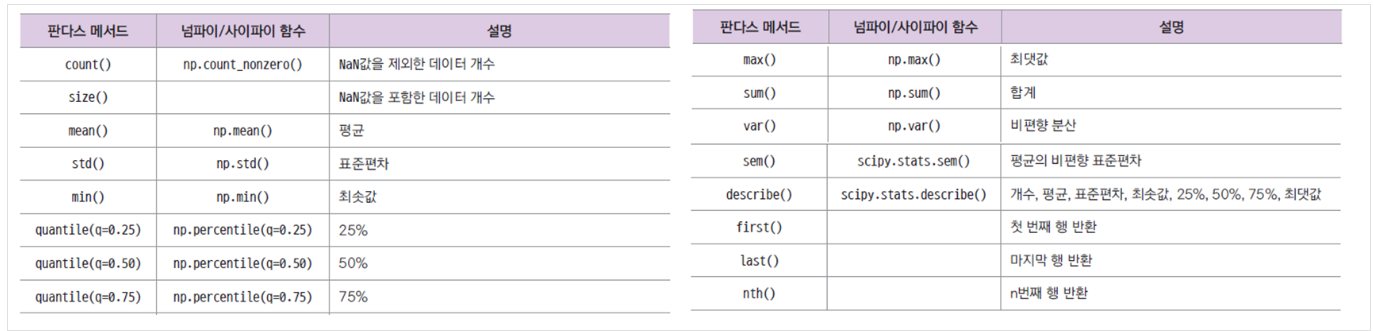

In [190]:
import numpy as np
df.groupby('continent').lifeExp.agg(['mean','std','min','max'])

,mean,std,min,max
continent,,,,
Africa,48.865330,9.150210,23.599,76.442
Americas,64.658737,9.345088,37.579,80.653
Asia,60.064903,11.864532,28.801,82.603
Europe,71.903686,5.433178,43.585,81.757
Oceania,74.326208,3.795611,69.120,81.235


In [191]:
df.groupby('continent').agg(
    {'lifeExp':'mean',
     'pop':'median',
     'gdpPercap':'max'}
)

,lifeExp,pop,gdpPercap
continent,,,
Africa,48.865330,4579311.0,21951.21176
Americas,64.658737,6227510.0,42951.65309
Asia,60.064903,14530830.5,113523.13290
Europe,71.903686,8551125.0,49357.19017
Oceania,74.326208,6403491.5,34435.36744


In [194]:
# 사용자정의 함수 UDF도 agg()에 적용 가능 
#agg(udf)

def my_zscore(x): # 표준점수, 나의 값이 전체 데이터 평균과 비교해서 얼마나 떨어져 있는지 보여주는 점수
    return ((x - x.mean()) / x.std())

#### 데이터변환 transform()

In [195]:
df.groupby('continent').lifeExp.transform(my_zscore)

0      -2.635073
1      -2.506033
2      -2.365698
3      -2.195190
4      -2.020889
          ...   
1699    1.473810
1700    1.258077
1701   -0.224730
1702   -0.970068
1703   -0.587782
Name: lifeExp, Length: 1704, dtype: float64

In [199]:
# 갯수 세는 함수 count()
df.groupby('continent').count()

,country,year,lifeExp,pop,gdpPercap
continent,,,,,
Africa,624,624,624,624,624
Americas,300,300,300,300,300
Asia,396,396,396,396,396
Europe,360,360,360,360,360
Oceania,24,24,24,24,24


In [201]:
country_s = df['country']
country_s.value_counts()

country
Afghanistan          12
Pakistan             12
New Zealand          12
Nicaragua            12
Niger                12
                     ..
Eritrea              12
Equatorial Guinea    12
El Salvador          12
Egypt                12
Zimbabwe             12
Name: count, Length: 142, dtype: int64

In [208]:
df.groupby('country').filter(lambda x:x['country'].count()>11)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [207]:
df.groupby('continent').filter(lambda x:x['continent'].count()>600)

,country,continent,year,lifeExp,pop,gdpPercap
24,Algeria,Africa,1952,43.077,9279525,2449.008185
25,Algeria,Africa,1957,45.685,10270856,3013.976023
26,Algeria,Africa,1962,48.303,11000948,2550.816880
27,Algeria,Africa,1967,51.407,12760499,3246.991771
28,Algeria,Africa,1972,54.518,14760787,4182.663766
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [211]:
df1 = df[df['year']>2000]
df1.groupby('continent').filter(lambda x:x['pop'].mean()>1000000)

,country,continent,year,lifeExp,pop,gdpPercap
10,Afghanistan,Asia,2002,42.129,25268405,726.734055
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
22,Albania,Europe,2002,75.651,3508512,4604.211737
23,Albania,Europe,2007,76.423,3600523,5937.029526
34,Algeria,Africa,2002,70.994,31287142,5288.040382
...,...,...,...,...,...,...
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906
1690,Zambia,Africa,2002,39.193,10595811,1071.613938
1691,Zambia,Africa,2007,42.384,11746035,1271.211593
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


## 3-5. 결측치 처리

NaN, NAN, nan

In [212]:
from numpy import NAN, NaN, nan

In [214]:
import pandas as np
pd.isnull(NAN)
pd.notnull(nan)

False